In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [80]:
data = pd.read_csv('heart_2020_cleaned.csv')
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [3]:
data.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [46]:
data = data.replace({'Yes': 1, 'No': 0})

data['Sex'] = data['Sex'].replace({'Female': 0, 'Male': 1})

data['AgeCategory'] = data['AgeCategory'].replace({'18-24': 21, '25-29': 27, '30-34': 32, 
              '35-39': 37, '40-44': 42, '45-49': 47, 
              '50-54': 52, '55-59': 57, '60-64': 62, 
              '65-69': 67, '70-74': 72, '75-79': 77, '80 or older': 80})

data['Race'] = data['Race'].replace({'White': 0, 'Black': 1, 'Asian': 2, 'American Indian/Alaskan Native': 3, 'Other': 4,
                                     'Hispanic': 5})

data['GenHealth'] = data['GenHealth'].replace({'Poor':0, 'Fair':1, 'Good':2, 'Very good':3, 'Excellent':4}) 

data['Diabetic'] = data['Diabetic'].replace({'No':0 , 'No, borderline diabetes':1 ,  'Yes (during pregnancy)':2 , 'Yes':3})   

In [47]:
col = 'SleepTime'
data.loc[(data[col] <= 6) , col] = 0 
data.loc[(data[col] > 6) & (data[col] <= 8 ), col] = 1
data.loc[(data[col] > 8 ) & (data[col] <=24), col] = 2    

In [48]:
cols =['PhysicalHealth' ,'MentalHealth']

for col in cols:
        data.loc[data[col] <=10 , col] = 0
        data.loc[(data[col] > 10) & (data[col] <=20 ), col] = 1
        data.loc[(data[col] > 20) & (data[col] <=25 ), col] = 2
        data.loc[(data[col] > 25) & (data[col] <=30 ), col] = 3

In [49]:
data.head()

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,HeartDisease
0,16.60,1,0,0,0.0,3.0,0,0,57,0,1,1,3,0.0,1,0,1,0
1,20.34,0,0,1,0.0,0.0,0,0,80,0,0,1,3,1.0,0,0,0,0
2,26.58,1,0,0,1.0,3.0,0,1,67,0,1,1,1,1.0,1,0,0,0
3,24.21,0,0,0,0.0,0.0,0,0,77,0,0,0,2,0.0,0,0,1,0
4,23.71,0,0,0,3.0,0.0,1,0,42,0,0,1,3,1.0,0,0,0,0


In [11]:
data['Race'].unique()

array(['White', 'Black', 'Asian', 'American Indian/Alaskan Native',
       'Other', 'Hispanic'], dtype=object)

In [12]:
data['GenHealth'].unique()

array(['Very good', 'Fair', 'Good', 'Poor', 'Excellent'], dtype=object)

In [14]:
data.describe()[1:][['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']].T

,mean,std,min,25%,50%,75%,max
BMI,28.325399,6.356100,12.02,24.03,27.34,31.42,94.85
PhysicalHealth,3.371710,7.950850,0.00,0.00,0.00,2.00,30.00
MentalHealth,3.898366,7.955235,0.00,0.00,0.00,3.00,30.00
SleepTime,7.097075,1.436007,1.00,6.00,7.00,8.00,24.00


C:\Users\Ксения\AppData\Local\Temp\ipykernel_1368\190715885.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


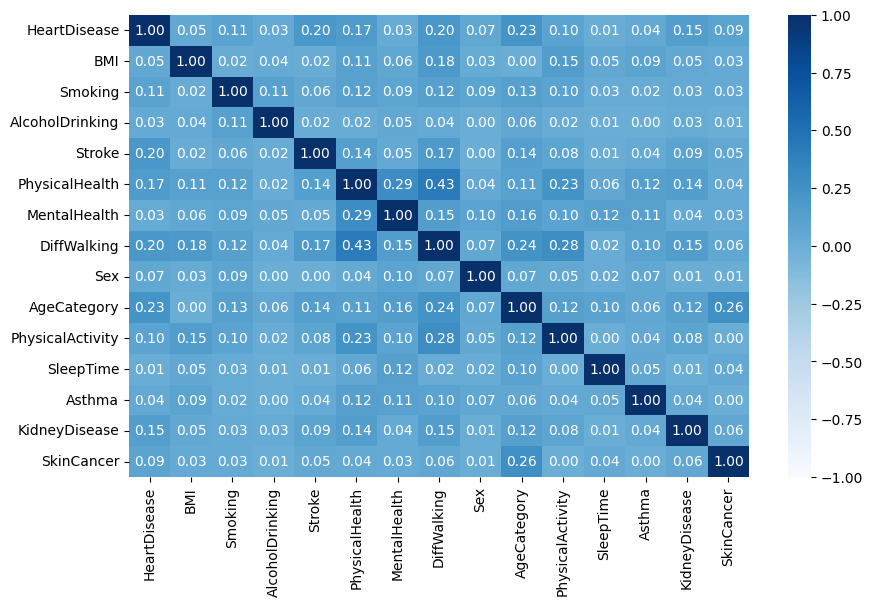

In [18]:
corr = data.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(abs(corr), annot=True, fmt='.2f', cmap='Blues', vmin=-1, vmax=1)
plt.show()

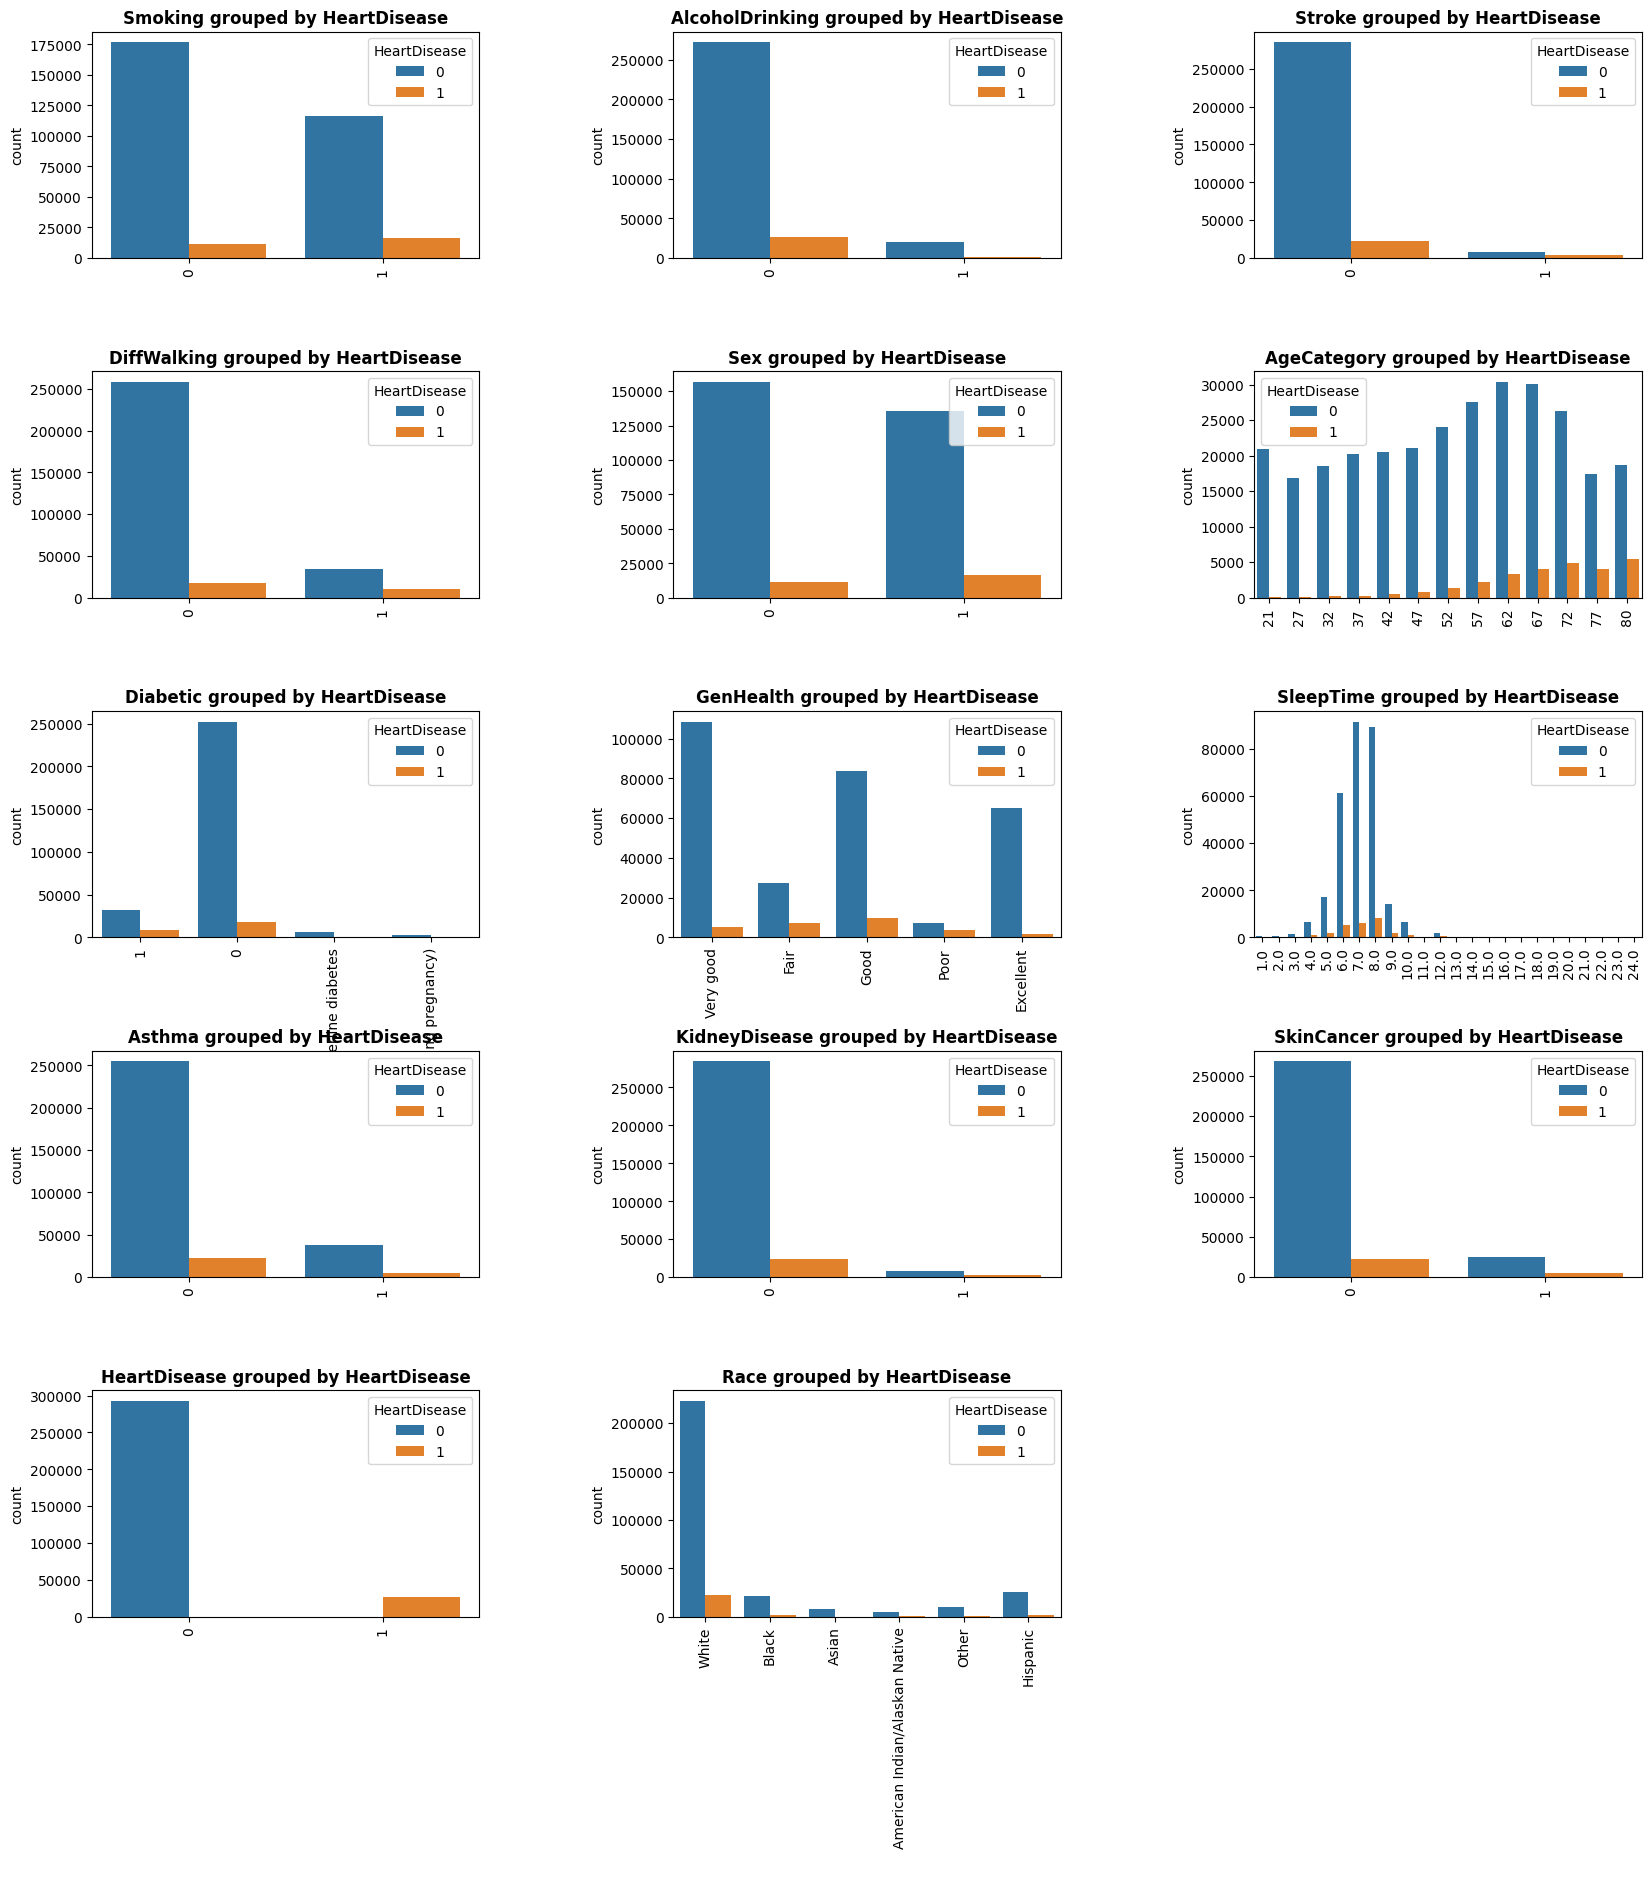

In [32]:
i=1
data_plot = data[['Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory', 'Diabetic',
                'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease', 'SkinCancer', 'HeartDisease', 'Race']]

plt.figure(figsize=(20,25))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
for col in data_plot.columns:
    plt.subplot(6,3,i)
    plt.xticks(rotation=90)
    sns.countplot(x=col,data=data_plot, hue='HeartDisease')
    plt.title(f"{col} grouped by HeartDisease",fontweight='bold')
    plt.xlabel(' ')
    i+=1

<Axes: ylabel='HeartDisease'>

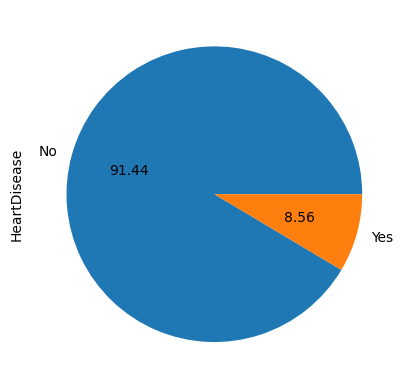

In [81]:
data['HeartDisease'].value_counts().plot.pie(autopct='%.2f')

# Выводы по графикам:
### <li>Количество людей, которые курят, имеют больше проблем с сердцем.</li> <li>Количество людей, которые не пьют, имеют больше проблем с сердцем.</li> <li>У мужчин больше сердечных приступов, чем у женщин.</li> <li>Люди, которые спят по 8 часов, имеют больше сердечных приступов.</li> <li>В основном, сердечные приступы происходят в возрасте 70-80 лет.</li> <li>У людей, у которых нет астмы, больше сердечных проблем.</li>

In [50]:
features = data.drop(columns =['HeartDisease'], axis = 1)
target = data['HeartDisease']  

In [51]:
from imblearn.over_sampling import RandomOverSampler

oversample=RandomOverSampler(sampling_strategy='minority')
x_resamled, y_resampled = oversample.fit_resample(features, target)

In [52]:
cols =['BMI', 'Smoking', 'AlcoholDrinking', 'Stroke', 'PhysicalHealth',
       'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory','Race' , 'Diabetic',
       'PhysicalActivity', 'GenHealth', 'SleepTime', 'Asthma', 'KidneyDisease',
       'SkinCancer', 'HeartDisease']
data = pd.DataFrame(np.column_stack((x_resamled, y_resampled)), columns=cols)

print(data.shape)

(584844, 18)


In [53]:
data['HeartDisease'].value_counts()

0.0    292422
1.0    292422
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

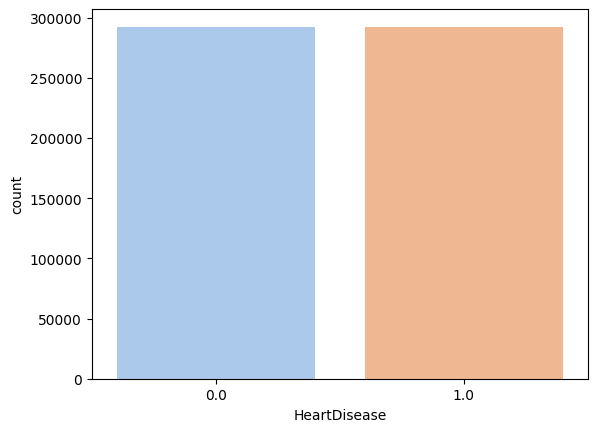

In [54]:
sns.countplot(x='HeartDisease',data=data,palette='pastel')

In [55]:
y=data['HeartDisease']
X=data.drop(['HeartDisease'], axis=1)
X.shape

(584844, 17)

In [78]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((467875, 17), (116969, 17))

In [58]:
models = {
    "Random Forest Classifier": RandomForestClassifier(),
    "Decision Tree Classifier": DecisionTreeClassifier()
}

model_list = []
accuracy_list = []

for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    model_list.append(model_name)
    accuracy_list.append(test_accuracy)
    
    print(model_name)
    print("Train Accuracy: {:.4f}".format(train_accuracy))
    print("Test Accuracy: {:.4f}".format(test_accuracy))
    print('\n')

Random Forest Classifier
Train Accuracy: 0.9894
Test Accuracy: 0.9556


Decision Tree Classifier
Train Accuracy: 0.9894
Test Accuracy: 0.9470




In [72]:
random_forest_model = RandomForestClassifier()
clf = random_forest_model.fit(X_train, y_train)
y_pred = random_forest_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

Accuracy of the model: 95.55%


In [73]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       1.00      0.91      0.95     58485
         1.0       0.92      1.00      0.96     58484

    accuracy                           0.96    116969
   macro avg       0.96      0.96      0.96    116969
weighted avg       0.96      0.96      0.96    116969



In [74]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[53497  4988]
 [  215 58269]]


In [75]:
decision_tree = DecisionTreeClassifier()
clf = decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

Accuracy of the model: 94.70%


In [76]:
classification_rep = classification_report(y_test, y_pred)
print(classification_rep)

              precision    recall  f1-score   support

         0.0       1.00      0.90      0.94     58485
         1.0       0.91      1.00      0.95     58484

    accuracy                           0.95    116969
   macro avg       0.95      0.95      0.95    116969
weighted avg       0.95      0.95      0.95    116969



In [77]:
conf = confusion_matrix(y_test, y_pred)
print(conf)

[[52543  5942]
 [  252 58232]]


In [79]:
mean_squared_error(y_test, y_pred)

0.05295420154057913